In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
df = pd.read_csv('C:/Users/LENOVO/Documents/RAKAMIN/VIX/Idx Partner/Final Task/loan.csv')
pd.set_option('display.max_columns',100)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# 1. DESCRIPTIVE STATISTICS

In [5]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


Terdapat beberapa variabel pada data numerik yang missing dan bernilai 0/NaN dan kolom kolom yang tidak dibutuhkan seperti ("unnammed, memeber id, policy_code & id") sehingga harus dihapus

In [6]:
df.drop(columns=['Unnamed: 0', 'member_id', 'id', 'policy_code'], inplace=True)

In [7]:
#menghapus kolom yang nilai seluruhnya NaN
df1 = df.dropna(axis=1,how='all')

In [8]:
df1.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


**berdasarkan penjealasan diatas kolom yang akan dihapus :**
- sub grade tidak diperlukan karena sudah terwakilkan oleh grade
- emp_tittle terlalu banyak values uniq sudah tergantikan dengan emp_length
- issue_d, url, desc, title, zip_code, earliest_cr_line, last_pymnt_d, next_pymnt_d & last_credit_pull_d terlalu banyak nilai uniq
- application type tidak diperlukan

In [9]:
df1.drop(columns=['sub_grade', 'emp_title','issue_d', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  loan_status                  466285 non-null  object 
 12  pymnt_plan                   466285 non-null  object 
 13 

# Perbaikan Label Feature (Status Pinjaman) untuk keperluan EDA
- Menemukan beberapa values yang tidak diperlukan didalam kolom loan_status 

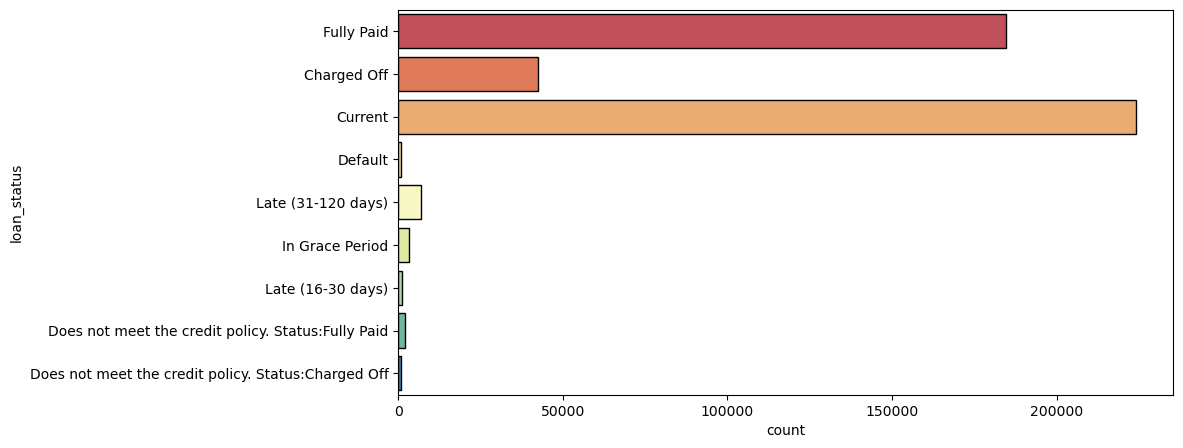

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [11]:
plt.figure(figsize=(10,5))
sns.countplot(y= "loan_status", data = df1, palette = 'Spectral', lw = 1, ec = 'k')
plt.show()

value_counts = df1["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

**Berdasarkan Penjelasan diatas :**

Berhasil / Disetujui = Fully Paid

Gagal / Ditolak = Charged Off, Default dan does not meet the credit policy

Late, In Grace Period dan Current tidak bisa digunakan karena status pinjaman masih berlangsung

In [12]:
# Menghapus values pada kolom loan_status
succes = ["Fully Paid"]
fail = ["Charged Off",
        "Default",
        "Does not meet the credit policy. Status:Charged off",
        "Does not meet the credit policy. Status:Fully Paid"]
def loan(status):
    if status in fail:
        return 'Gagal Bayar'
    return 'Berhasil Bayar'


In [13]:
df_loan = df1[df1["loan_status"].isin(succes + fail)].copy()
df_loan["loan_status"] = df_loan["loan_status"].apply(loan)

In [14]:
df_loan['loan_status'].value_counts()

Berhasil Bayar    184739
Gagal Bayar        45295
Name: loan_status, dtype: int64

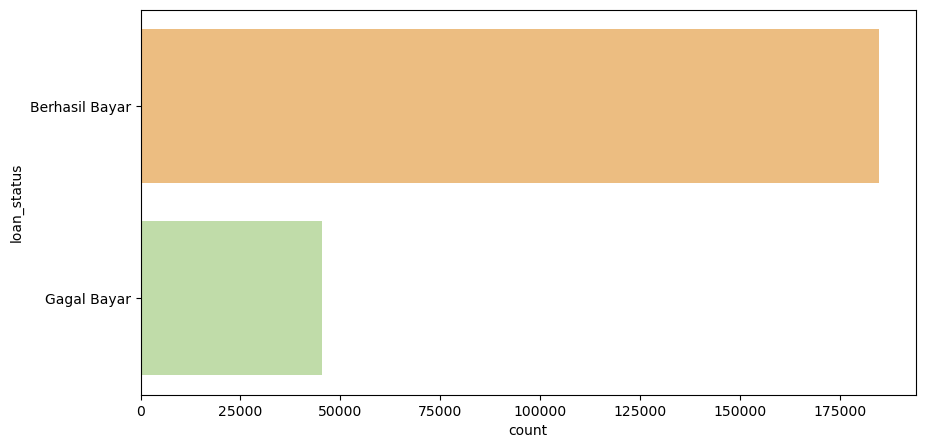

Berhasil Bayar    80.31%
Gagal Bayar       19.69%
Name: loan_status, dtype: object


In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y= "loan_status", data = df_loan, palette = "Spectral")
plt.show()

value_counts = df_loan["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

# 2. EDA

## Annual Income Borrowers

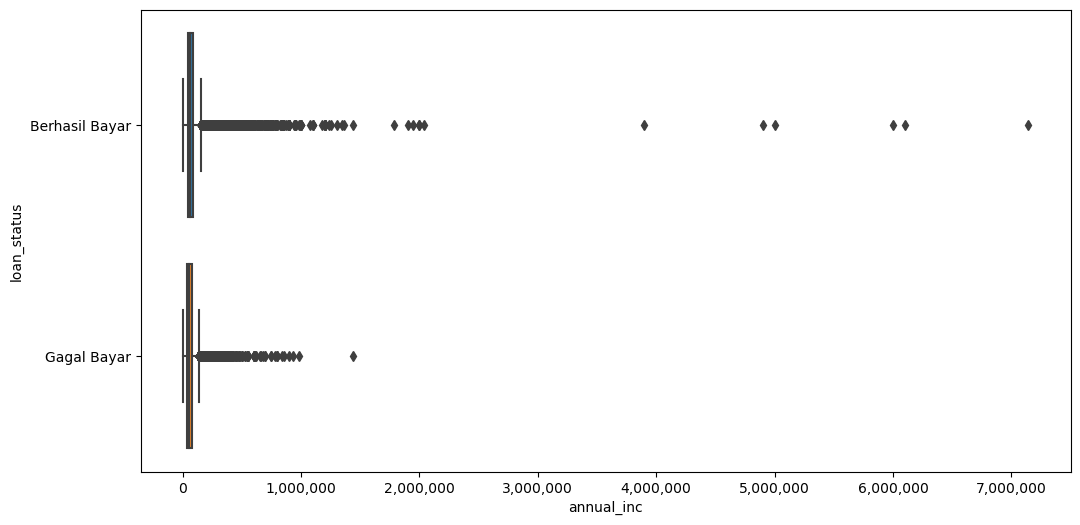

In [24]:
import matplotlib.ticker as mticker

# Visualisasi status pelanggan berdasarkan tenure
plt.figure(figsize=(12, 6))
sns.boxplot(x='annual_inc', y='loan_status', data=df_loan, orient='h')


# Mengatur format label sumbu x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))  # Mengubah label x menjadi format ribuan

plt.show()



Persebaran gagal bayar hanya terjadi pada annual_income < 2.0000.000. <br>
Hal ini menunjukan bahwa peminjam dengan pendapatan tahunan yang rendah lebih cenderung mengalami kesulitan dalam membayar pinjaman mereka.

## Grade

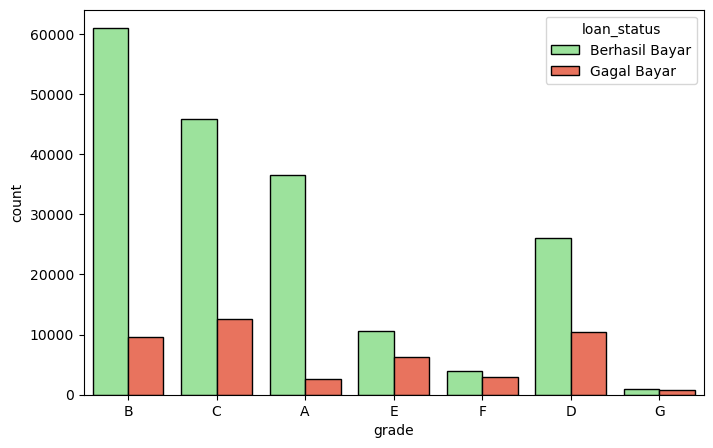

,grade,loan_status,Jumlah_Peminjam,Jumlah_Total_Peminjam,Rasio
0,A,Berhasil Bayar,36455,39102,93.23
1,A,Gagal Bayar,2647,39102,6.77
2,B,Berhasil Bayar,60962,70537,86.43
3,B,Gagal Bayar,9575,70537,13.57
4,C,Berhasil Bayar,45818,58478,78.35
5,C,Gagal Bayar,12660,58478,21.65
6,D,Berhasil Bayar,26089,36543,71.39
7,D,Gagal Bayar,10454,36543,28.61
8,E,Berhasil Bayar,10569,16787,62.96
9,E,Gagal Bayar,6218,16787,37.04


In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_loan,x='grade',hue='loan_status',   palette = ['lightgreen', 'tomato'], 
            lw = 1, ec = 'k')
#plt.xticks(rotation=180, ha='right')
plt.show()

df1 = df_loan.groupby(['grade', 'loan_status']).agg(Jumlah_Peminjam=( 'loan_status', 'count')).reset_index()
df2 =  df_loan.groupby('grade').agg(Jumlah_Total_Peminjam=('grade', 'count')).reset_index()
df_merge = df1.merge(df2, on = 'grade')

# Menambah Kolom Rasio
df_merge['Rasio'] = round (df_merge['Jumlah_Peminjam'] / df_merge['Jumlah_Total_Peminjam'] * 100,2)

#ubah nama data
df_merge['loan_status'] = df_merge['loan_status'].replace({0: 'berhasil bayar', 1: 'gagal bayar'})
df_merge

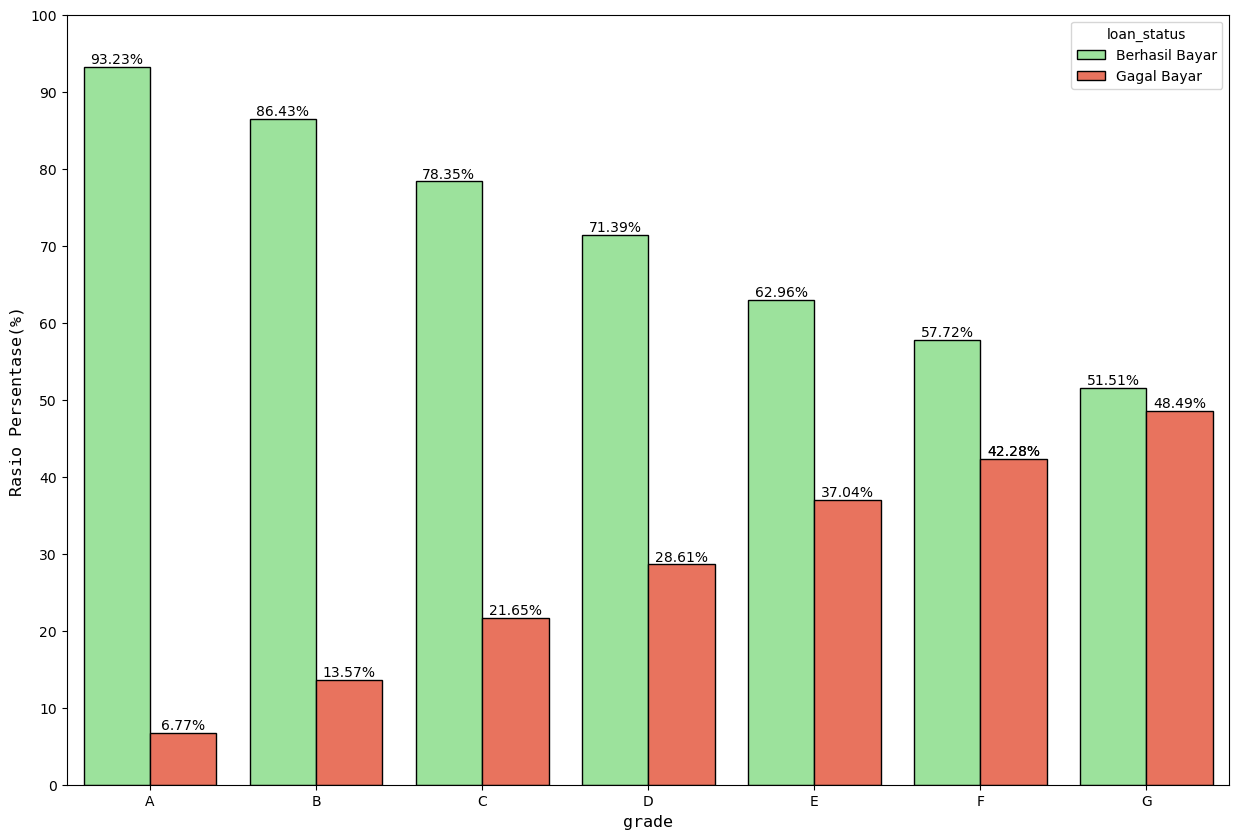

In [26]:
import seaborn as sns
# Membuat plot
plt.figure (figsize = (15, 10))
sns.barplot(x ='grade', y = 'Rasio', hue = 'loan_status', data = df_merge, palette = [ 'lightgreen', 'tomato'], lw = 1, ec = 'k')

# Memberi judul pada plot dan sumbu-sumbunya
plt.xlabel('grade', fontsize = 12, fontname='monospace')
plt.ylabel('Rasio Persentase(%)', fontsize = 12,fontname='monospace')
plt.text(x=-0.20, y=94.23, s='93.23%', ha='center', va='center', fontsize=10)
plt.text(x=0.20, y=7.77, s='6.77%', ha='center', va='center', fontsize=10)
plt.text(x=0.80, y=87.43, s='86.43%', ha='center', va='center', fontsize=10)
plt.text(x=1.20, y=14.57, s='13.57%', ha='center', va='center', fontsize=10)
plt.text(x=1.80, y=79.35, s='78.35%', ha='center', va='center', fontsize=10)
plt.text(x=2.20, y=22.65, s='21.65%', ha='center', va='center', fontsize=10)
plt.text(x=2.80, y=72.39, s='71.39%', ha='center', va='center', fontsize=10)
plt.text(x=3.20, y=29.61, s='28.61%', ha='center', va='center', fontsize=10)
plt.text(x=3.80, y=63.96, s='62.96%', ha='center', va='center', fontsize=10)
plt.text(x=4.20, y=38.04, s='37.04%', ha='center', va='center', fontsize=10)
plt.text(x=4.80, y=58.72, s='57.72%', ha='center', va='center', fontsize=10)
plt.text(x=5.20, y=43.28, s='42.28%', ha='center', va='center', fontsize=10)
plt.text(x=5.20, y=43.28, s='42.28%', ha='center', va='center', fontsize=10)
plt.text(x=5.80, y=52.51, s='51.51%', ha='center', va='center', fontsize=10)
plt.text(x=6.20, y=49.49, s='48.49%', ha='center', va='center', fontsize=10)
plt.yticks(range(0, 110, 10)) 


# Menampilkan plot
plt.show()

 semakin rendah peringkat (grade) pinjaman, semakin tinggi risiko gagal bayar. 

## Term

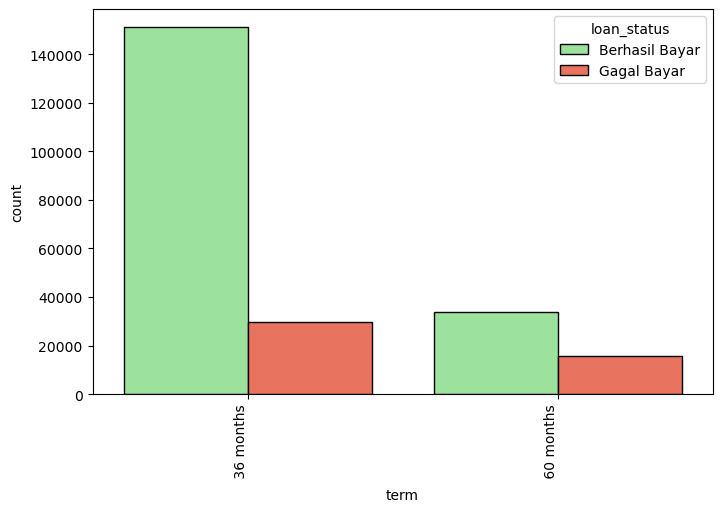

,term,loan_status,Jumlah_Peminjam,Jumlah_Total_Peminjam,Rasio
0,36 months,Berhasil Bayar,151101,180835,83.56
1,36 months,Gagal Bayar,29734,180835,16.44
2,60 months,Berhasil Bayar,33638,49199,68.37
3,60 months,Gagal Bayar,15561,49199,31.63


In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_loan,x='term',hue='loan_status',   palette = ['lightgreen', 'tomato'], 
            lw = 1, ec = 'k')
plt.xticks(rotation=90, ha='right')
plt.show()

df1 = df_loan.groupby(['term', 'loan_status']).agg(Jumlah_Peminjam=( 'loan_status', 'count')).reset_index()
df2 =  df_loan.groupby('term').agg(Jumlah_Total_Peminjam=('term', 'count')).reset_index()
df_merge = df1.merge(df2, on = 'term')

# Menambah Kolom Rasio
df_merge['Rasio'] = round (df_merge['Jumlah_Peminjam'] / df_merge['Jumlah_Total_Peminjam'] * 100,2)

#ubah nama data
df_merge['loan_status'] = df_merge['loan_status'].replace({0: 'berhasil bayar', 1: 'gagal bayar'})
df_merge

Banyak gagal bayar terjadi di jangka waktu 36 bulan <br>
jika dilihat dalam bentuk persentase jumlah gagal bayar terbanyak terjadi pada jangka waktu 60 bulan

# Tujuan Menggunakan Pinjaman (Purpose)

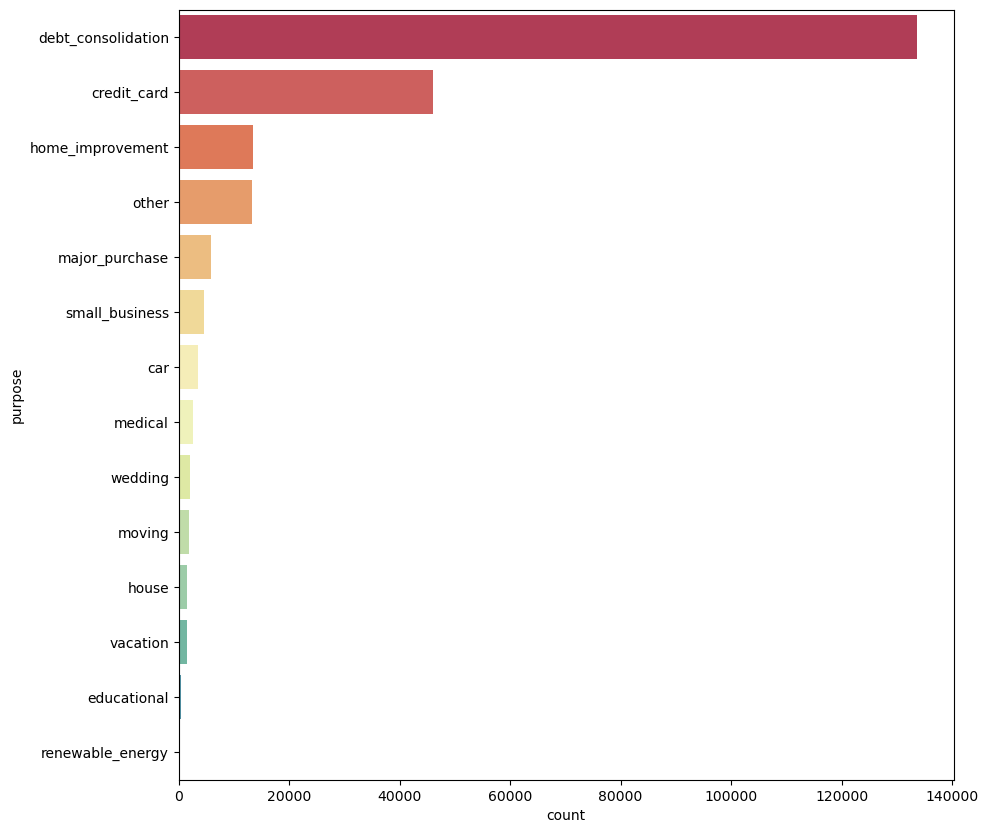

debt_consolidation    58.09%
credit_card           19.99%
home_improvement       5.81%
other                  5.73%
major_purchase         2.53%
small_business         1.99%
car                    1.50%
medical                1.14%
wedding                0.87%
moving                 0.80%
house                  0.65%
vacation               0.62%
educational            0.17%
renewable_energy       0.11%
Name: purpose, dtype: object


In [17]:
plt.figure(figsize=(10,10))
sns.countplot(y= "purpose",order=value_counts.index, data = df_loan, palette = "Spectral")
plt.show()

value_counts = df_loan["purpose"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Hampir 60% Peminjaman digunakan untuk menutupi hutang sebelumnya

In [70]:
df_pre = df_loan.copy()

# 3. Preprocessing

# Feature Encoding

In [71]:
# Drop column ymnt_plan
df_pre = df_pre.drop(['pymnt_plan'], axis=1)

### one Hot Encoding

In [72]:
df_pre = pd.get_dummies(df_pre, columns=['term'], prefix=['term'])

In [73]:
df_pre = pd.get_dummies(df_pre, columns=['purpose'], prefix=['purpose'])

In [74]:
df_pre = pd.get_dummies(df_pre, columns=['grade'], prefix=['grade'])

In [75]:
df_pre = pd.get_dummies(df_pre, columns=['home_ownership'], prefix=['home_ownership'])

In [76]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230034 entries, 0 to 466283
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    230034 non-null  int64  
 1   funded_amnt                  230034 non-null  int64  
 2   funded_amnt_inv              230034 non-null  float64
 3   int_rate                     230034 non-null  float64
 4   installment                  230034 non-null  float64
 5   emp_length                   221294 non-null  object 
 6   annual_inc                   230030 non-null  float64
 7   verification_status          230034 non-null  object 
 8   loan_status                  230034 non-null  object 
 9   addr_state                   230034 non-null  object 
 10  dti                          230034 non-null  float64
 11  delinq_2yrs                  230008 non-null  float64
 12  inq_last_6mths               230008 non-null  float64
 13 

In [77]:
df_pre

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 36 months,term_ 60 months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,5000,4975.0,10.65,162.87,10+ years,24000.0,Verified,Berhasil Bayar,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,171.62,0.0,NaN,0.0,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2500,2500,2500.0,15.27,59.83,< 1 year,30000.0,Source Verified,Gagal Bayar,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,119.66,0.0,NaN,0.0,NaN,NaN,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2400,2400,2400.0,15.96,84.33,10+ years,12252.0,Not Verified,Berhasil Bayar,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,649.91,0.0,NaN,0.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,10000,10000,10000.0,13.49,339.31,10+ years,49200.0,Source Verified,Berhasil Bayar,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,357.48,0.0,NaN,0.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,5000,5000,5000.0,7.90,156.46,3 years,36000.0,Source Verified,Berhasil Bayar,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,161.03,0.0,NaN,0.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,18.25,217.65,5 years,37536.0,Verified,Gagal Bayar,MA,12.28,4.0,0.0,3.0,NaN,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.00,1159.40,11.594,217.65,0.0,4.0,0.0,0.0,116995.0,49800.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
466277,18000,18000,17975.0,7.90,563.23,3 years,90000.0,Verified,Gagal Bayar,MD,10.33,1.0,0.0,14.0,NaN,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.00,0.00,0.000,563.23,0.0,14.0,0.0,0.0,42592.0,50300.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
466278,10000,10000,10000.0,18.25,362.78,10+ years,42000.0,Source Verified,Berhasil Bayar,VA,11.57,0.0,0.0,29.0,NaN,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.00,0.00,0.000,5501.60,0.0,32.0,0.0,0.0,10170.0,11100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
466281,22000,22000,22000.0,19.97,582.50,10+ years,78000.0,Verified,Gagal Bayar,TN,18.45,0.0,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.000,17.50,0.0,NaN,0.0,0.0,221830.0,39400.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


## Feature Selection
menghapus fitur yang tidak diperlukan

Uji Statistik

In [78]:
import numpy as np
from scipy import stats
# Pisahkan data menjadi dua kelompok berdasarkan 'loan_status'
group1 = df_pre[df_pre['loan_status'] == 'Berhasil Bayar']['installment']
group2 = df_pre[df_pre['loan_status'] == 'Gagal Bayar']['installment']

# Lakukan t-test independen
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Tampilkan hasil uji
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretasi hasil
alpha = 0.05  # Tingkat signifikansi yang Anda tentukan
if p_value < alpha:
    print("Ada perbedaan yang signifikan dalam rata-rata 'acc_now_delinq' antara 'Berhasil Bayar' dan 'Gagal Bayar'.")
else:
    print("Tidak ada perbedaan yang signifikan dalam rata-rata 'acc_now_delinq' antara 'Berhasil Bayar' dan 'Gagal Bayar'.")


T-statistic: -17.62084635092994
P-value: 1.8937209938993881e-69
Ada perbedaan yang signifikan dalam rata-rata 'acc_now_delinq' antara 'Berhasil Bayar' dan 'Gagal Bayar'.


In [79]:
df_pre.drop(columns=['funded_amnt_inv','emp_length','addr_state', 'verification_status', 'delinq_2yrs','inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec','revol_bal','revol_util','total_acc','mths_since_last_major_derog', 'initial_list_status','out_prncp','out_prncp_inv','total_pymnt_inv','collection_recovery_fee', 'last_pymnt_amnt','collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'acc_now_delinq'], inplace=True)

In [80]:
df_pre['loan_status'] = df_pre['loan_status'].replace({'Gagal Bayar': '1', 'Berhasil Bayar': '0'})

In [81]:
df_pre['loan_status'] = df_pre['loan_status'].astype(int)

In [82]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230034 entries, 0 to 466283
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230034 non-null  int64  
 1   funded_amnt                 230034 non-null  int64  
 2   int_rate                    230034 non-null  float64
 3   installment                 230034 non-null  float64
 4   annual_inc                  230030 non-null  float64
 5   loan_status                 230034 non-null  int32  
 6   dti                         230034 non-null  float64
 7   total_pymnt                 230034 non-null  float64
 8   total_rec_prncp             230034 non-null  float64
 9   total_rec_int               230034 non-null  float64
 10  total_rec_late_fee          230034 non-null  float64
 11  recoveries                  230034 non-null  float64
 12  term_ 36 months             230034 non-null  uint8  
 13  term_ 60 month

### Corelation heatmap (untuk mencegah terjadinya feature redundan)

<AxesSubplot:>

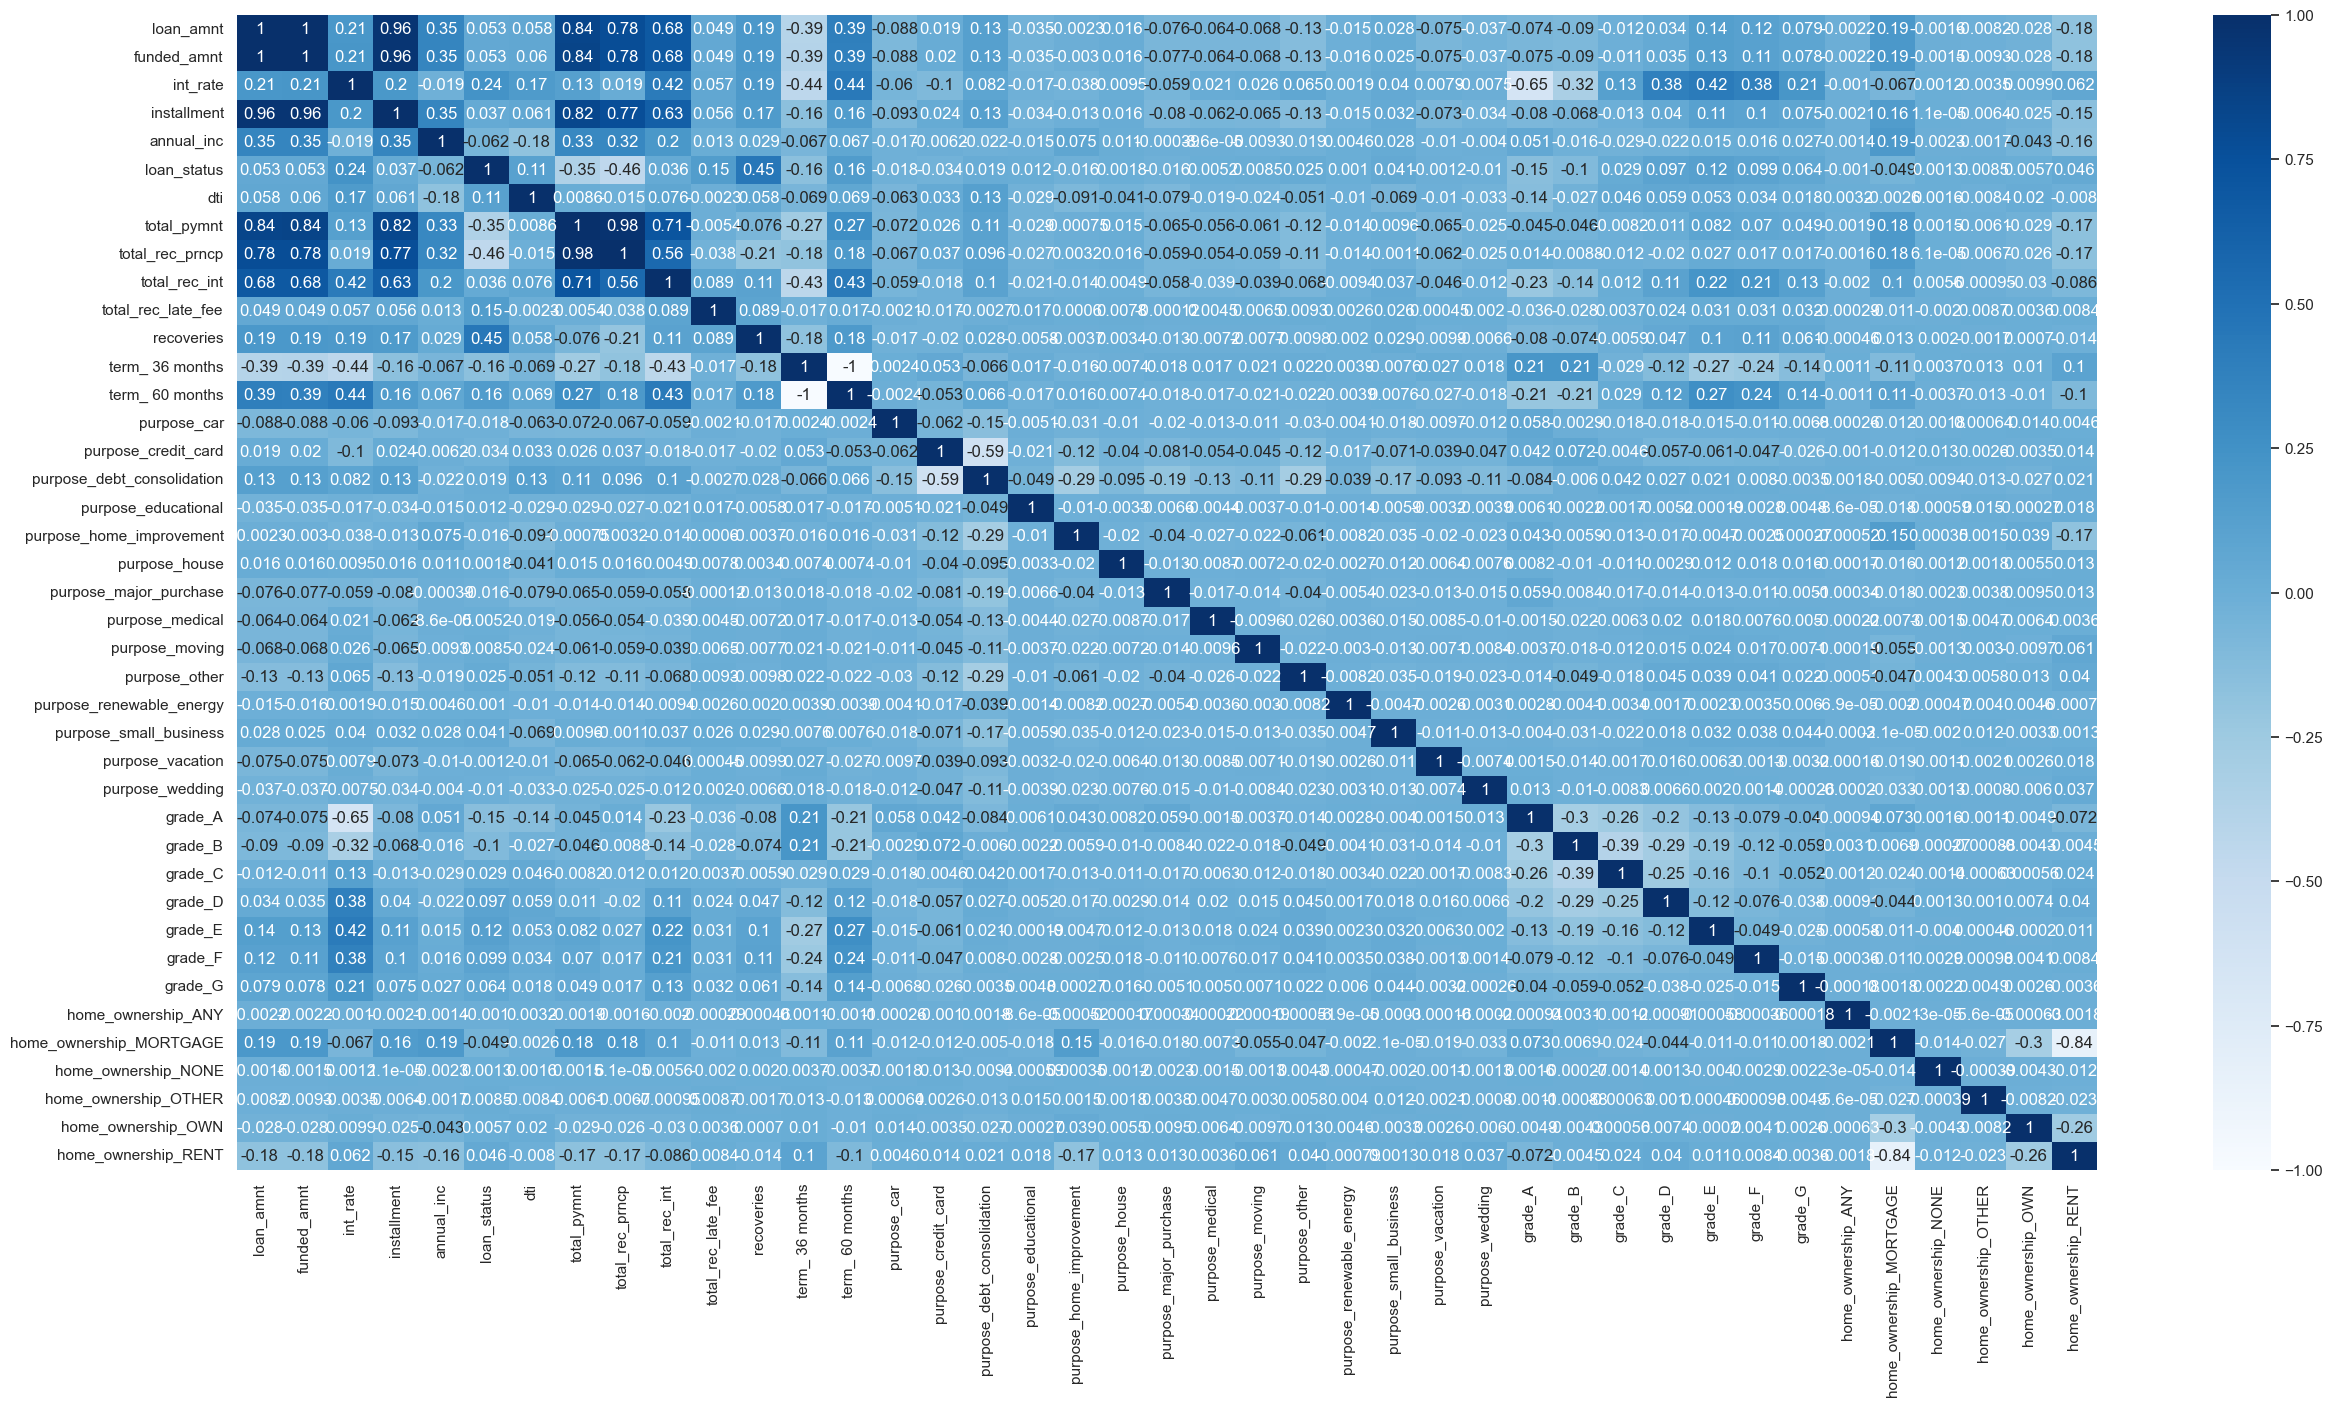

In [83]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_pre.corr(), cmap='Blues', annot=True)

**Berdasarkan Keterangan Heatmap diatas:**
- loan_amnt,installment dan funded_amnt memiliki korelasi yang tinggi sehingga 2 feature lainnya harus di drop (loan_amnt & installment)
- total_rec_prncp & total_pymnt juga memiliki korelasi yang tinggi sehingga harus di drop (total_rec_prncp) untuk menghindari feature redundant

In [84]:
df_pre = df_pre.drop(['loan_amnt', 'installment','total_rec_prncp'], axis=1)

In [85]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230034 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   funded_amnt                 230034 non-null  int64  
 1   int_rate                    230034 non-null  float64
 2   annual_inc                  230030 non-null  float64
 3   loan_status                 230034 non-null  int32  
 4   dti                         230034 non-null  float64
 5   total_pymnt                 230034 non-null  float64
 6   total_rec_int               230034 non-null  float64
 7   total_rec_late_fee          230034 non-null  float64
 8   recoveries                  230034 non-null  float64
 9   term_ 36 months             230034 non-null  uint8  
 10  term_ 60 months             230034 non-null  uint8  
 11  purpose_car                 230034 non-null  uint8  
 12  purpose_credit_card         230034 non-null  uint8  
 13  purpose_debt_c

###  Handle Values yang tidak diperlukan dan Missing Values

In [86]:
import pandas as pd

# Menghitung jumlah nilai yang hilang per kolom
missing_values = df_pre.isnull().sum()

# Menghitung total baris dalam DataFrame
total_rows = len(df_pre)

# Menghitung persentase missing values per kolom
missing_percentage = (missing_values / total_rows) * 100

# Menampilkan hasil
print(missing_percentage)


funded_amnt                   0.000000
int_rate                      0.000000
annual_inc                    0.001739
loan_status                   0.000000
dti                           0.000000
total_pymnt                   0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
term_ 36 months               0.000000
term_ 60 months               0.000000
purpose_car                   0.000000
purpose_credit_card           0.000000
purpose_debt_consolidation    0.000000
purpose_educational           0.000000
purpose_home_improvement      0.000000
purpose_house                 0.000000
purpose_major_purchase        0.000000
purpose_medical               0.000000
purpose_moving                0.000000
purpose_other                 0.000000
purpose_renewable_energy      0.000000
purpose_small_business        0.000000
purpose_vacation              0.000000
purpose_wedding               0.000000
grade_A                  

hanya kolom annual_inc yang terdapat missing values dan dilihat dari persentase missing values sangat kecil kurang dari 1% sehingga akan di drop missing values pada kolom annual_inc

In [87]:
# Hapus missing values
df_pre.dropna(subset=['annual_inc'], inplace=True)

In [88]:
import pandas as pd

# Menghitung jumlah nilai yang hilang per kolom
missing_values = df_pre.isnull().sum()

# Menghitung total baris dalam DataFrame
total_rows = len(df_pre)

# Menghitung persentase missing values per kolom
missing_percentage = (missing_values / total_rows) * 100

# Menampilkan hasil
print(missing_percentage)

funded_amnt                   0.0
int_rate                      0.0
annual_inc                    0.0
loan_status                   0.0
dti                           0.0
total_pymnt                   0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
term_ 36 months               0.0
term_ 60 months               0.0
purpose_car                   0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_house                 0.0
purpose_major_purchase        0.0
purpose_medical               0.0
purpose_moving                0.0
purpose_other                 0.0
purpose_renewable_energy      0.0
purpose_small_business        0.0
purpose_vacation              0.0
purpose_wedding               0.0
grade_A                       0.0
grade_B                       0.0
grade_C                       0.0
grade_D                       0.0
grade_E       

In [89]:
df = df_pre.copy()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230030 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   funded_amnt                 230030 non-null  int64  
 1   int_rate                    230030 non-null  float64
 2   annual_inc                  230030 non-null  float64
 3   loan_status                 230030 non-null  int32  
 4   dti                         230030 non-null  float64
 5   total_pymnt                 230030 non-null  float64
 6   total_rec_int               230030 non-null  float64
 7   total_rec_late_fee          230030 non-null  float64
 8   recoveries                  230030 non-null  float64
 9   term_ 36 months             230030 non-null  uint8  
 10  term_ 60 months             230030 non-null  uint8  
 11  purpose_car                 230030 non-null  uint8  
 12  purpose_credit_card         230030 non-null  uint8  
 13  purpose_debt_c

### Handle Outlier

In [91]:
nums = ['annual_inc', 'total_pymnt']

In [92]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 230030
Jumlah baris setelah memfilter outlier: 225513


In [93]:
df= df.drop(['total_rec_int', 'total_rec_late_fee', 'recoveries'], axis=1)

In [94]:
df

,funded_amnt,int_rate,annual_inc,loan_status,dti,total_pymnt,term_ 36 months,term_ 60 months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,10.65,24000.0,0,27.65,5861.071414,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,30000.0,1,1.00,1008.710000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2400,15.96,12252.0,0,8.72,3003.653644,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,10000,13.49,49200.0,0,20.00,12226.302210,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,5000,7.90,36000.0,0,11.20,5631.377753,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,18.25,37536.0,1,12.28,2029.930000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
466277,18000,7.90,90000.0,1,10.33,5631.670000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
466278,10000,18.25,42000.0,0,11.57,12394.165200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
466281,22000,19.97,78000.0,1,18.45,4677.920000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


## Feature Transform (StandardScaller)

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['annual_inc_std'] = StandardScaler().fit_transform(df['annual_inc'].values.reshape(len(df), 1))
df['total_pymnt_std'] = StandardScaler().fit_transform(df['total_pymnt'].values.reshape(len(df), 1))

In [96]:
df= df.drop(['annual_inc', 'total_pymnt'], axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225513 entries, 0 to 466283
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   funded_amnt                 225513 non-null  int64  
 1   int_rate                    225513 non-null  float64
 2   loan_status                 225513 non-null  int32  
 3   dti                         225513 non-null  float64
 4   term_ 36 months             225513 non-null  uint8  
 5   term_ 60 months             225513 non-null  uint8  
 6   purpose_car                 225513 non-null  uint8  
 7   purpose_credit_card         225513 non-null  uint8  
 8   purpose_debt_consolidation  225513 non-null  uint8  
 9   purpose_educational         225513 non-null  uint8  
 10  purpose_home_improvement    225513 non-null  uint8  
 11  purpose_house               225513 non-null  uint8  
 12  purpose_major_purchase      225513 non-null  uint8  
 13  purpose_medica

# 4. Machine Learning

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

### split test & train

In [99]:
#split test & train
y = df['loan_status']
X = df.drop('loan_status', axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Class Imbalance

In [100]:
#class imbalance
from imblearn import over_sampling
X_train_over, y_train_over = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train, y_train)

In [65]:
df

,funded_amnt,int_rate,loan_status,dti,term_ 36 months,term_ 60 months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc_std,total_pymnt_std
0,5000,10.65,0,27.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.286795,-0.824811
1,2500,15.27,1,1.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.113955,-1.375263
2,2400,15.96,0,8.72,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.625214,-1.148957
3,10000,13.49,0,20.00,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.560870,-0.102738
5,5000,7.90,0,11.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.941116,-0.850867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,18.25,1,12.28,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.896869,-1.259416
466277,18000,7.90,1,10.33,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.614437,-0.850834
466278,10000,18.25,0,11.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.768277,-0.083696
466281,22000,19.97,1,18.45,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.268759,-0.959028


# DecisionTreeClasifier

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(DecisionTreeClassifier(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [102]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train_over, y_train_over) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.91
Recall (Test Set): 0.92
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00
Recall (crossval train): 1.0
Recall (crossval test): 0.9048183736326283


nilai dari matrik evalaluasi cukup bagus akan tetapi pada rata rata cross validation data test & data train terlihat model cukup overfitting

## Logistic Regression

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(LogisticRegression(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [111]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train_over, y_train_over) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.87
Recall (Test Set): 0.84
F1-Score (Test Set): 0.86
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.96
recall (crossval train): 0.806242535980523
recall (crossval test): 0.8093093018878902


pada model logistic regression model terlihat cukup baik terlihat dari skor matrik evaluasi juga tidak ada tanda overfitting ataupun underfitting

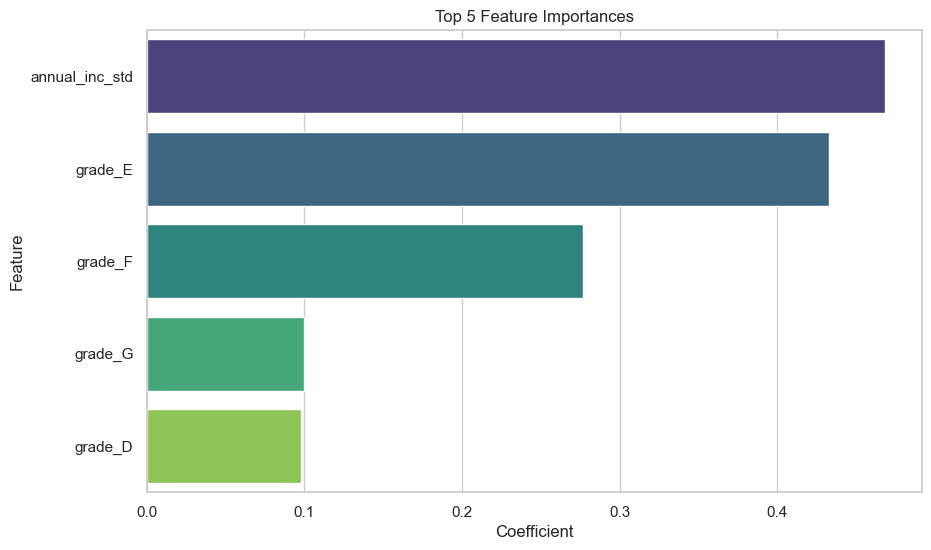

In [105]:
def show_feature_importance(model, feature_names):
    coef = model.coef_[0]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
    feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(), x='Coefficient', y='Feature', palette='viridis')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.title('Top 5 Feature Importances')
    plt.show()   

show_feature_importance(logreg, X_train_over.columns)



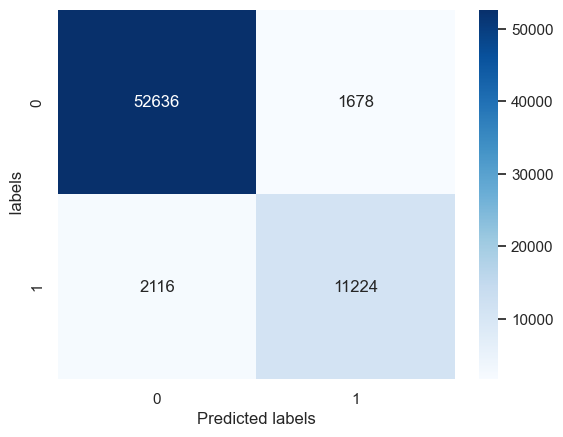

In [106]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=0, suppress=True, threshold=100000)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel(" labels")
plt.show()

## LGBM

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc-Score (Test Set): %.2f" % roc_auc_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(LGBMClassifier(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(6).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [108]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_over,y_train_over)

y_pred = dt.predict(X_test)
eval_classification(lgbm)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.99
Recall (Test Set): 0.91
F1-Score (Test Set): 0.95
roc_auc-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Recall (crossval train): 0.9212524147437113
Recall (crossval test): 0.898812550688292


## XGBOOST

In [445]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(XGBClassifier(), X, y, cv=5, scoring='f1', return_train_score=True)
    print('f1 (crossval train): '+ str(score['train_score'].mean()))
    print('f1 (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(6).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [446]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_over, y_train_over)
eval_classification(xg)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.99
Recall (Test Set): 0.92
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
f1 (crossval train): 0.9630415835845525
f1 (crossval test): 0.9425626460855394


## Random Forest

In [447]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [448]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_over, y_train_over)
eval_classification(rf)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.99
Recall (Test Set): 0.87
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval train): 0.9999277088849512
recall (crossval test): 0.8413808257644755
